In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

KeyboardInterrupt: 

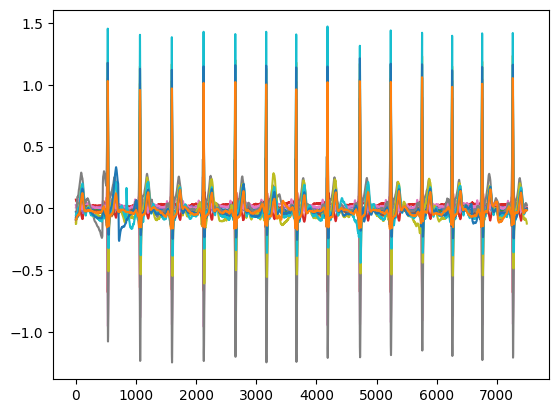

In [29]:
import matplotlib.pyplot as plt
# plot the signal
for i in range(12):
 plt.plot(signal[i])

In [ ]:
import pandas as pd
df = pd.read_csv('/kaggle/input/metadata/metadata.csv')

In [31]:
def remove_nonprimary_code(x):
    r = []
    for cx in x:
     for c in cx.split('+'):
         if int(c) < 200 or int(c) >= 500:
             if c not in r:
                 r.append(c)
     return r

In [32]:
codes = df.AHA_Code.str.split(';')
primary_codes = codes.apply(remove_nonprimary_code)

In [33]:
# get the diagnosis
desc = pd.read_csv('/kaggle/input/metadata/code.csv')
print('The diagnosis:')
for c in primary_codes[N-1]:
 print(desc[desc.Code == int(c)].Description.iloc[0])

The diagnosis:
Normal ECG


In [34]:
from numpy.fft import fft, fftshift, fftfreq
import numpy as np

In [37]:
df_train

,ECG_ID,AHA_Code,Patient_ID,Age,Sex,N,Date
0,A00001,22;23,S00001,55,M,5000,2020-03-04
1,A00002,1,S00002,32,M,6000,2019-09-03
2,A00003,1,S00003,63,M,6500,2020-07-16
3,A00004,23,S00004,31,M,5000,2020-07-14
4,A00005,146,S00005,47,M,5500,2020-01-07
...,...,...,...,...,...,...,...
25764,A25765,1,S24661,52,F,5000,2019-08-26
25765,A25766,146,S24662,33,F,5000,2020-03-22
25766,A25767,23,S24663,37,F,5000,2020-03-01
25768,A25769,22;147,S24665,65,M,5000,2020-01-19


In [25]:
desc

,Category,Code,Description
0,A,1,Normal ECG
1,C,21,Sinus tachycardia
2,C,22,Sinus bradycardia
3,C,23,Sinus arrhythmia
4,D,30,Atrial premature complex(es)
5,D,31,"Atrial premature complexes, nonconducted"
6,D,36,Junctional premature complex(es)
7,D,37,Junctional escape complex(es)
8,E,50,Atrial fibrillation
9,E,51,Atrial flutter


In [26]:
df

,ECG_ID,AHA_Code,Patient_ID,Age,Sex,N,Date
0,A00001,22;23,S00001,55,M,5000,2020-03-04
1,A00002,1,S00002,32,M,6000,2019-09-03
2,A00003,1,S00003,63,M,6500,2020-07-16
3,A00004,23,S00004,31,M,5000,2020-07-14
4,A00005,146,S00005,47,M,5500,2020-01-07
...,...,...,...,...,...,...,...
25765,A25766,146,S24662,33,F,5000,2020-03-22
25766,A25767,23,S24663,37,F,5000,2020-03-01
25767,A25768,147,S24664,56,F,5000,2020-06-07
25768,A25769,22;147,S24665,65,M,5000,2020-01-19


In [2]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.9 MB/s eta 0:00:00


In [1]:
import os
import h5py
import numpy as np
import pandas as pd
from glob import glob
import scipy.signal as signal
from scipy.signal import find_peaks, savgol_filter
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import torch
from torch.utils.data import Dataset, DataLoader

def ultra_filter(y):
    """Фильтрация ЭКГ с использованием метода Савицкого-Голея и поиска пиков."""
    x = np.linspace(0, len(y) - 1, len(y))

    # Найдем пики
    peaks, _ = find_peaks(y, height=(0.1, 0.5), distance=10)
    peaks = peaks[peaks < len(y)]

    # Найдем тренд с помощью фильтра Савицкого-Голея
    y_trend = savgol_filter(y, window_length=51, polyorder=3)

    # Удалим тренд, чтобы получить колебания (пики и волны)
    y_fluctuations = y - y_trend

    # Обработаем волны (сгладим их)
    y_waves_smoothed = savgol_filter(y_fluctuations, window_length=21, polyorder=2)

    # Восстановим данные, добавив колебания к тренду
    y_restored = y_trend + y_waves_smoothed

    return y_restored

# Загрузка метаданных
df = pd.read_csv('/kaggle/input/metadata/metadata.csv')
df['Sex'] = df['Sex'].map({'F': 0, 'M': 1})

# Нормализуем возраст (MinMax от 0 до 1)
age_scaler = MinMaxScaler()
df['Age'] = age_scaler.fit_transform(df[['Age']])

healthy_code = '1'
df['label'] = (df['AHA_Code'] == healthy_code).astype(int)

num_records = 10000
fixed_length = 7500
all_signals = np.zeros((num_records, 12, fixed_length), dtype=np.float32)
all_labels = np.zeros(num_records, dtype=np.int64)
all_metadata = np.zeros((num_records, 2), dtype=np.float32)

for idx, row in df.iterrows():
    if idx % 100 == 0:
        print(idx)
    if idx == num_records:
        break

    ecg_id = row['ECG_ID']
    label = row['label']
    sex = row['Sex']
    age = row['Age']

    with h5py.File(f'/kaggle/input/ecgdata/records/{ecg_id}.h5', 'r') as f:
        signal_data = f['ecg'][()]

    if signal_data.shape[1] < fixed_length:
        padding = np.zeros((12, fixed_length - signal_data.shape[1]))
        signal_data = np.hstack((signal_data, padding))
    elif signal_data.shape[1] > fixed_length:
        signal_data = signal_data[:, :fixed_length]

    # Применение нового фильтра
    for lead in range(12):
        signal_data[lead] = ultra_filter(signal_data[lead])

    all_signals[idx] = signal_data
    all_labels[idx] = label
    all_metadata[idx] = [sex, age]


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000


In [3]:
class ECGDataset(Dataset):
    def __init__(self, signals, labels, metadata):
        self.data = torch.tensor(signals, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.int64)
        self.metadata = torch.tensor(metadata, dtype=torch.float32)  

    def __len__(self):
        return self.data.shape[0]  #

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx], self.metadata[idx] 

dataset = ECGDataset(all_signals, all_labels, all_metadata)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

print("✅ Датасет создан, готов к обучению модели!")

✅ Датасет создан, готов к обучению модели!


In [ ]:
from torch import nn
class Autoencoder(nn.Module):
    def __init__(self, input_dim=7500, latent_dim=16):
        super(Autoencoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv1d(in_channels=12, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.MaxPool1d(kernel_size=2, stride=2),  

            nn.Conv1d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.MaxPool1d(kernel_size=2, stride=2),  

            nn.Conv1d(128, latent_dim, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm1d(latent_dim),
            nn.MaxPool1d(kernel_size=2, stride=2)  
        )

        # === Decoder ===
        self.decoder = nn.Sequential(
            nn.Upsample(scale_factor=2, mode="nearest"), 
            nn.ConvTranspose1d(latent_dim, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm1d(128),

            nn.Upsample(scale_factor=2, mode="nearest"), 
            nn.ConvTranspose1d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm1d(128),

            nn.Upsample(scale_factor=2, mode="nearest"),  
            nn.ConvTranspose1d(128, 12, kernel_size=3, stride=1, padding=1),
            nn.Tanh()  
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)

        if decoded.shape[2] != x.shape[2]:
            decoded = nn.functional.interpolate(decoded, size=x.shape[2], mode="linear", align_corners=False)

        return decoded, encoded

In [5]:
import torch.optim as optim
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    for batch, labels, metadata in dataloader: 
        batch = batch.to(device)
        if torch.isnan(batch).any() or torch.isinf(batch).any():
            print(f"⚠️ Найдены NaN/inf в batch на эпохе {epoch + 1}, пропускаем...")
            continue
        optimizer.zero_grad()
        
        decoded, _ = model(batch)  
        loss = criterion(decoded, batch)  
        
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/10], Loss: 0.0049
Epoch [2/10], Loss: 0.0099
Epoch [3/10], Loss: 0.0033
Epoch [4/10], Loss: 0.0044
Epoch [5/10], Loss: 0.0052
Epoch [6/10], Loss: 0.0344
Epoch [7/10], Loss: 0.0092
Epoch [8/10], Loss: 0.0039
Epoch [9/10], Loss: 0.0035
Epoch [10/10], Loss: 0.0056


Размерность all_encoded: (10000, 16, 937)
Размерность all_encoded: (10000, 14992)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Adjusted Rand Index (сравнение с истинными метками): -0.0004


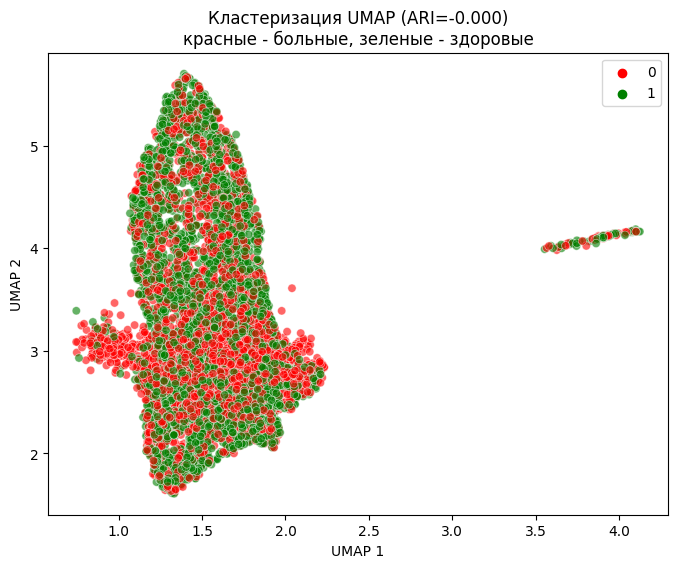

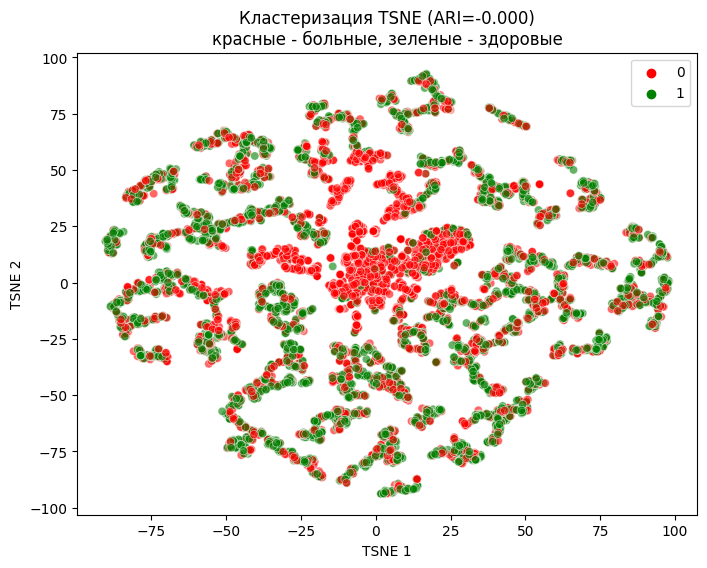

In [9]:
import umap
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans

all_encoded = []
all_labels_list = []

with torch.no_grad():
    for batch, labels, meta in dataloader:
        batch = batch.to(device)
        _, encoded = model(batch)
        all_encoded.append(encoded.cpu().numpy())
        all_labels_list.append(labels.numpy())

all_encoded = np.vstack(all_encoded)
print(f"Размерность all_encoded: {all_encoded.shape}") 
all_labels_list = np.hstack(all_labels_list)

if all_encoded.ndim == 3:
    all_encoded = all_encoded.reshape(all_encoded.shape[0], -1)
print(f"Размерность all_encoded: {all_encoded.shape}") 

# Кластеризация KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(all_encoded)

# Вычисление Adjusted Rand Index
ari = adjusted_rand_score(all_labels_list, clusters)
print(f"\nAdjusted Rand Index (сравнение с истинными метками): {ari:.4f}")

# Визуализация UMAP
umap_model = umap.UMAP(n_components=12)
embedded_umap = umap_model.fit_transform(all_encoded)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=embedded_umap[:, 0], y=embedded_umap[:, 1], 
                hue=all_labels_list, palette={0: "red", 1: "green"}, 
                alpha=0.6)
plt.title(f"Кластеризация UMAP (ARI={ari:.3f})\nкрасные - больные, зеленые - здоровые")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.show()

# Визуализация TSNE
tsne = TSNE(n_components=2, perplexity=30)
embedded_tsne = tsne.fit_transform(embedded_umap)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=embedded_tsne[:, 0], y=embedded_tsne[:, 1], 
                hue=all_labels_list, palette={0: "red", 1: "green"}, 
                alpha=0.6)
plt.title(f"Кластеризация TSNE (ARI={ari:.3f})\nкрасные - больные, зеленые - здоровые")
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.show()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


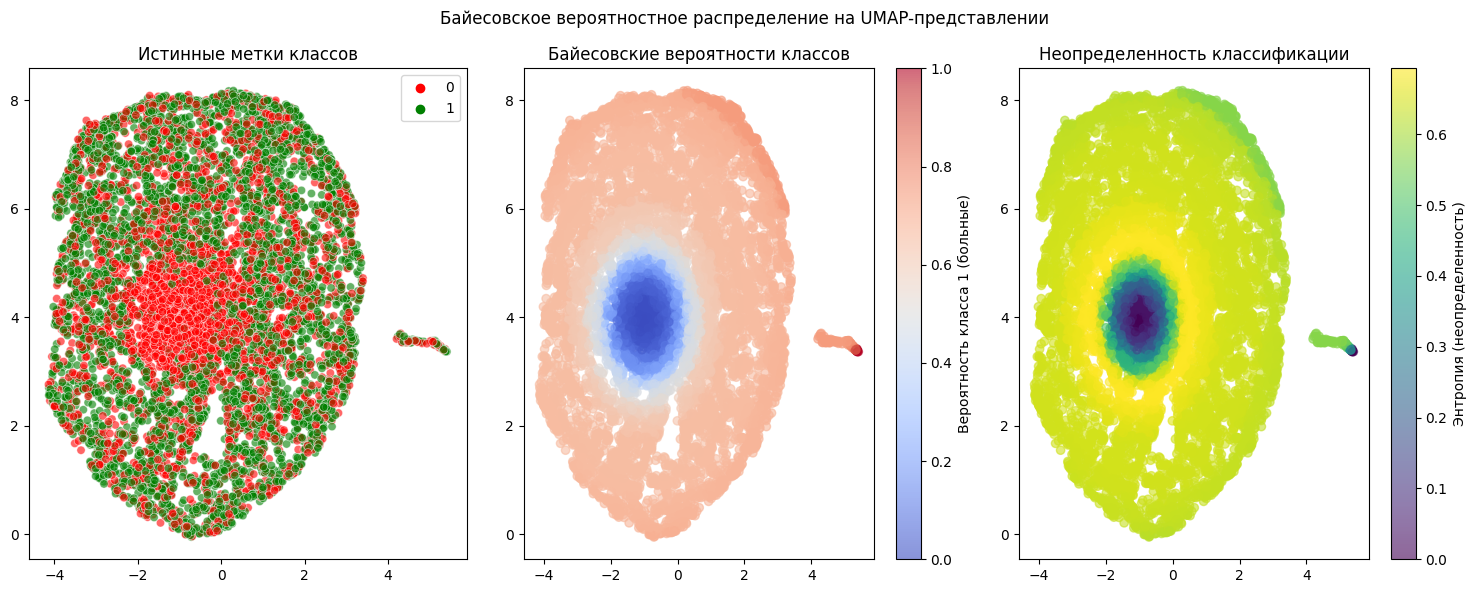


Точность на тестовом наборе: 0.6837


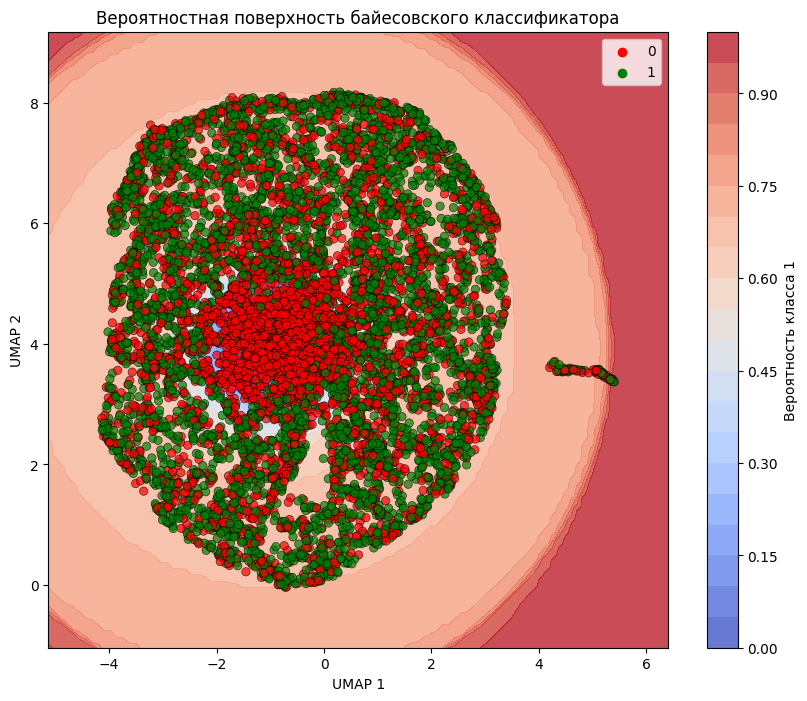

In [10]:
import umap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import adjusted_rand_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV
import torch
from scipy.stats import multivariate_normal

# Загрузка и подготовка данных (как в вашем оригинальном коде)
all_encoded = []
all_labels_list = []

with torch.no_grad():
    for batch, labels, meta in dataloader:
        batch = batch.to(device)
        _, encoded = model(batch)
        all_encoded.append(encoded.cpu().numpy())
        all_labels_list.append(labels.numpy())

all_encoded = np.vstack(all_encoded)
all_labels_list = np.hstack(all_labels_list)

if all_encoded.ndim == 3:
    all_encoded = all_encoded.reshape(all_encoded.shape[0], -1)

# UMAP проекция
umap_model = umap.UMAP(n_components=2, random_state=42)
embedded_umap = umap_model.fit_transform(all_encoded)

# Разделение на train/test для оценки качества
X_train, X_test, y_train, y_test = train_test_split(
    embedded_umap, all_labels_list, test_size=0.3, random_state=42
)

# Байесовский классификатор с калибровкой вероятностей
bayes_model = GaussianNB()
calibrated_model = CalibratedClassifierCV(bayes_model, method='isotonic', cv=5)
calibrated_model.fit(X_train, y_train)

# Предсказание вероятностей для всех точек
probabilities = calibrated_model.predict_proba(embedded_umap)

# Визуализация вероятностного распределения
plt.figure(figsize=(15, 6))

# 1. Визуализация истинных меток
plt.subplot(131)
sns.scatterplot(
    x=embedded_umap[:, 0], y=embedded_umap[:, 1],
    hue=all_labels_list, palette={0: "red", 1: "green"},
    alpha=0.6
)
plt.title("Истинные метки классов")

# 2. Визуализация предсказанных вероятностей класса 1
plt.subplot(132)
scatter = plt.scatter(
    embedded_umap[:, 0], embedded_umap[:, 1],
    c=probabilities[:, 1], cmap='coolwarm',
    alpha=0.6, vmin=0, vmax=1
)
plt.colorbar(scatter, label='Вероятность класса 1 (больные)')
plt.title("Байесовские вероятности классов")

# 3. Визуализация неопределенности (энтропия распределения)
entropy = -np.sum(probabilities * np.log(probabilities + 1e-10), axis=1)
plt.subplot(133)
scatter = plt.scatter(
    embedded_umap[:, 0], embedded_umap[:, 1],
    c=entropy, cmap='viridis',
    alpha=0.6
)
plt.colorbar(scatter, label='Энтропия (неопределенность)')
plt.title("Неопределенность классификации")

plt.suptitle("Байесовское вероятностное распределение на UMAP-представлении")
plt.tight_layout()
plt.show()

# Оценка качества модели
test_probs = calibrated_model.predict_proba(X_test)
test_preds = np.argmax(test_probs, axis=1)
test_accuracy = np.mean(test_preds == y_test)
print(f"\nТочность на тестовом наборе: {test_accuracy:.4f}")

# Построение вероятностной поверхности
def plot_probability_surface(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 8))
    contour = plt.contourf(xx, yy, Z, levels=20, cmap='coolwarm', alpha=0.8)
    plt.colorbar(contour, label='Вероятность класса 1')
    sns.scatterplot(
        x=X[:, 0], y=X[:, 1],
        hue=y, palette={0: "red", 1: "green"},
        edgecolor='k', alpha=0.7
    )
    plt.title("Вероятностная поверхность байесовского классификатора")
    plt.xlabel("UMAP 1")
    plt.ylabel("UMAP 2")
    plt.show()

plot_probability_surface(calibrated_model, embedded_umap, all_labels_list)